# Solving Murder Mystery Using SQL


---


There's been a Murder in **SQL City**! The SQL Murder Mystery is designed to be both a self-directed lesson to learn SQL concepts and commands and a fun game for experienced SQL users to solve an intriguing crime.

A crime has taken place and the detective needs your help. The detective gave you the crime scene report, but you somehow lost it. You vaguely remember that the crime was a ​murder​ that occurred sometime on ​Jan.15, 2018​ and that it took place in ​SQL City​. Start by retrieving the corresponding crime scene report from the police department’s database.

The Objective of this project is to learn SQL by solving murder mystery.

## About Data


---


**About this file**:

Data Source - Kaggle - https://www.kaggle.com/datasets/johnp47/sql-murder-mystery-database

Website link - http://mystery.knightlab.com/

Github Repository - https://github.com/NUKnightLab/sql-mysteries

Schema - https://github.com/NUKnightLab/sql-mysteries/blob/master/schema.png

**Credits**:

The SQL Murder Mystery was created by Joon Park and Cathy He while they were Knight Lab fellows. See the GitHub repository for more information.

Adapted and produced for the web by Joe Germuska.

This mystery was inspired by a crime in the neighboring Terminal City.

Web-based SQL is made possible by SQL.js

SQL query custom web components created and released to the public domain by Zi Chong Kao, creator of Select Star SQL.

Detective illustration courtesy of Vectors by Vecteezy

Original code for this project is released under the MIT License

Original text and other content for this project is released under Creative Commons CC BY-SA 4.0

**Schema**:

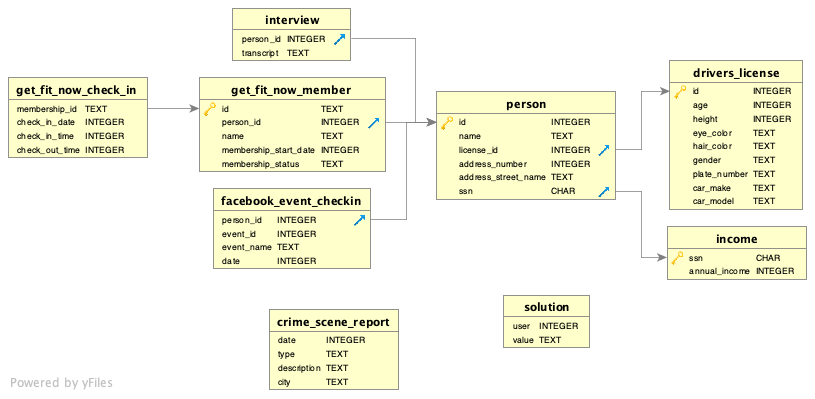

# Let's Start Solving

## 1. Import the libraries and Load the data

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import sqlite3 as sql

In [7]:
# establishing connection to the database

connection = sql.connect('/content/sql-murder-mystery.db')

## 2. Listing the tables in the database

In [3]:
def list_tables(database_name):
    try:

      cursor = connection.cursor()

      # Fetch the list of tables in the database
      cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
      tables = cursor.fetchall()

      # Print the list of tables
      print("Tables in the database:")
      for table in tables:
        print(table[0])

        # Close the connection
        connection.close()

    except sql.Error as e:
      print("Error:", e)

# Replace 'your_database.db' with the path to your SQLite database file
list_tables('sql-murder-mystery.db')


Tables in the database:
crime_scene_report
drivers_license
person
facebook_event_checkin
interview
get_fit_now_member
get_fit_now_check_in
income
solution


## 3. Exploring the data

## 3.1 Understanding SELECT, FROM, WHERE and LIMIT statements

In [5]:
# checking the data in 'person' table

query = '''
SELECT *
FROM person;
'''

In [8]:
# setting maximum dataframe width
pd.set_option('display.max_colwidth', None)

# let's run the query
pd.read_sql_query(query, connection)

,id,name,license_id,address_number,address_street_name,ssn
0,10000,Christoper Peteuil,993845,624,Bankhall Ave,747714076
1,10007,Kourtney Calderwood,861794,2791,Gustavus Blvd,477972044
2,10010,Muoi Cary,385336,741,Northwestern Dr,828638512
3,10016,Era Moselle,431897,1987,Wood Glade St,614621061
4,10025,Trena Hornby,550890,276,Daws Hill Way,223877684
...,...,...,...,...,...,...
10006,99936,Luba Benser,274427,680,Carnage Blvd,685095054
10007,99941,Roxana Mckimley,975942,1613,Gate St,512136801
10008,99965,Cherie Zeimantz,287627,3661,The Water Ave,362877324
10009,99982,Allen Cruse,251350,3126,N Jean Dr,348734531


### Exploring 'drivers_license' table and see the rows WHERE gender are male and using LIMIT to see only 10 rows.

In [13]:
query = '''
SELECT *
FROM drivers_license
WHERE gender = 'male'
LIMIT 10;
'''

In [14]:
pd.read_sql_query(query, connection)

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,100280,72,57,brown,red,male,P24L4U,Acura,MDX
1,101568,53,78,brown,blue,male,SJ57LL,Saab,9-5
2,101586,57,70,amber,brown,male,31U1KE,Jaguar,XK
3,101640,87,67,amber,black,male,3U18J6,Volvo,S60
4,101862,26,75,green,blonde,male,LQ23Y5,Nissan,350Z
5,101909,84,52,amber,brown,male,5Y633C,Ford,E-Series
6,102182,66,63,green,white,male,JI6481,Saturn,S-Series
7,102355,29,67,blue,blonde,male,7K625Q,Ford,F350
8,102536,21,76,blue,blonde,male,3DG322,Suzuki,Grand Vitara
9,102844,30,62,blue,blue,male,471TX3,Chevrolet,Trailblazer


### Displaying information of a single person using 'id'

In [19]:
query = '''
SELECT *
FROM drivers_license
WHERE id = '100280';
'''

In [20]:
pd.read_sql_query(query, connection)

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,100280,72,57,brown,red,male,P24L4U,Acura,MDX


## 3.2 Using AND, OR in WHERE and ORDER BY statements

In [25]:
# top 5 persons with high annual income

query = '''
SELECT *
FROM income
ORDER BY annual_income DESC
LIMIT 5;
'''

In [26]:
pd.read_sql_query(query, connection)

,ssn,annual_income
0,361660921,498500
1,121635236,489800
2,118015315,486600
3,541217354,476300
4,313890530,475700


Filtering data from 'crime_scene_report' where crime type is 'murder' in SQL city.

In [28]:
query = '''
SELECT *
FROM crime_scene_report
WHERE type='murder' AND city='SQL City';
'''

pd.read_sql_query(query, connection)

,date,type,description,city
0,20180215,murder,REDACTED REDACTED REDACTED,SQL City
1,20180215,murder,Someone killed the guard! He took an arrow to the knee!,SQL City
2,20180115,murder,"Security footage shows that there were 2 witnesses. The first witness lives at the last house on ""Northwestern Dr"". The second witness, named Annabel, lives somewhere on ""Franklin Ave"".",SQL City


In [32]:
query = '''
SELECT *
FROM crime_scene_report
WHERE type NOT IN ('murder', 'fraud') AND city in ('SQL City', 'NYC');
'''

pd.read_sql_query(query, connection)

,date,type,description,city
0,20180115,robbery,A Man Dressed as Spider-Man Is on a Robbery Spree,NYC
1,20170712,theft,"A lone hunter stalks the night, firing arrows into the Darkness.\n There is no hiding, no escape. In the distance, the beast\n falters, tethered to the void. The killing blow comes without\n hesitation, without mercy.",SQL City
2,20170820,arson,"Wield the Hammer of Sol with honor, Titan, it is a thing of\n legend, both past and future.",SQL City
3,20171110,robbery,"The Gjallarhorn shoulder-mounted rocket system was forged from\n the armor of Guardians who fell at the Twilight Gap. Gifted\n to the survivors of that terrible battle, the Gjallarhorn\n is seen as a symbol of honor and survival.",SQL City
4,20180103,bribery,"Apparently, Cayde thought it necessary to expose this extremely\n rare vegetable to a Hive summoning ritual.",SQL City
5,20180115,assault,"Hamilton: Lee, do you yield? Burr: You shot him in the side! Yes he yields!",SQL City
6,20180115,assault,Report Not Found,SQL City


In [33]:
query = '''
SELECT *
FROM crime_scene_report
WHERE city = 'SQL City' OR city = 'NYC';
'''

pd.read_sql_query(query, connection)

,date,type,description,city
0,20180115,robbery,A Man Dressed as Spider-Man Is on a Robbery Spree,NYC
1,20180215,murder,REDACTED REDACTED REDACTED,SQL City
2,20180215,murder,Someone killed the guard! He took an arrow to the knee!,SQL City
3,20170712,theft,"A lone hunter stalks the night, firing arrows into the Darkness.\n There is no hiding, no escape. In the distance, the beast\n falters, tethered to the void. The killing blow comes without\n hesitation, without mercy.",SQL City
4,20170820,arson,"Wield the Hammer of Sol with honor, Titan, it is a thing of\n legend, both past and future.",SQL City
5,20171110,robbery,"The Gjallarhorn shoulder-mounted rocket system was forged from\n the armor of Guardians who fell at the Twilight Gap. Gifted\n to the survivors of that terrible battle, the Gjallarhorn\n is seen as a symbol of honor and survival.",SQL City
6,20180103,bribery,"Apparently, Cayde thought it necessary to expose this extremely\n rare vegetable to a Hive summoning ritual.",SQL City
7,20180115,assault,"Hamilton: Lee, do you yield? Burr: You shot him in the side! Yes he yields!",SQL City
8,20180115,assault,Report Not Found,SQL City
9,20180115,murder,"Security footage shows that there were 2 witnesses. The first witness lives at the last house on ""Northwestern Dr"". The second witness, named Annabel, lives somewhere on ""Franklin Ave"".",SQL City


In [34]:
# finding the person in  driver's license table
# whose is a male, eye color green and a blonde hair color

query = '''
SELECT *
FROM drivers_license
WHERE gender = 'male' AND eye_color = 'green' AND hair_color = 'blonde';
'''

pd.read_sql_query(query, connection)

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,101862,26,75,green,blonde,male,LQ23Y5,Nissan,350Z
1,112200,28,70,green,blonde,male,22N2E2,Mercedes-Benz,SL-Class
2,116883,23,77,green,blonde,male,Z15461,Honda,Civic
3,119629,19,51,green,blonde,male,C8K707,Dodge,Ram 2500
4,122605,87,68,green,blonde,male,183373,Ford,Flex
...,...,...,...,...,...,...,...,...,...
110,965251,81,71,green,blonde,male,6QF4T4,Jeep,Liberty
111,965917,51,53,green,blonde,male,663N16,BMW,7 Series
112,967345,89,56,green,blonde,male,B02222,Mitsubishi,Eclipse
113,987741,56,50,green,blonde,male,64A01Q,Mercury,Cougar


## 3.3 Using basic functions (e.g., COUNT, SUM, AVG, MAX, MIN)

In [35]:
query = '''
SELECT SUM(annual_income) AS Totat_Annual_Income,
AVG(annual_income) AS Average_Annual_Income,
MIN(annual_income) AS Minimum_Annual_Income,
MAX(annual_income) AS Maximum_Annual_Income

FROM income;
'''

pd.read_sql_query(query, connection)

,Totat_Annual_Income,Average_Annual_Income,Minimum_Annual_Income,Maximum_Annual_Income
0,400179100,53257.798776,10000,498500


In [37]:
# count of number of cases of type murder
query = '''
SELECT COUNT(*) AS Total_Number_Murders
FROM crime_scene_report
WHERE type = 'murder';
'''

pd.read_sql_query(query, connection)

,Total_Number_Murders
0,148


## 3.4 Understanding JOINs (INNER JOIN, LEFT JOIN, RIGHT JOIN)

In [42]:
# finding car details of a person using 'person' and 'drivers_license' tables

query = '''
SELECT person.id AS id,
person.name AS name,
drivers_license.age AS age,
drivers_license.gender AS gender,
drivers_license.plate_number AS license_plate_number,
drivers_license.car_make AS car_make,
drivers_license.car_model AS car_model
FROM person
INNER JOIN drivers_license
ON person.license_id = drivers_license.id;
'''

pd.read_sql_query(query, connection)

,id,name,age,gender,license_plate_number,car_make,car_model
0,10000,Christoper Peteuil,46,male,557472,Chrysler,Town & Country
1,10007,Kourtney Calderwood,54,female,3P6DMS,BMW,M Roadster
2,10010,Muoi Cary,24,female,GM6Y5J,Mercedes-Benz,CLS-Class
3,10016,Era Moselle,22,female,461S1M,Ford,Ranger
4,10025,Trena Hornby,45,female,8030O8,Toyota,Tacoma Xtra
...,...,...,...,...,...,...,...
10001,99936,Luba Benser,26,female,3O06O3,Ford,Explorer
10002,99941,Roxana Mckimley,87,female,PYO673,Volvo,XC70
10003,99965,Cherie Zeimantz,29,female,Z784RR,Audi,S5
10004,99982,Allen Cruse,66,male,CJ2QC2,Buick,LaCrosse


In [43]:
# left inner join

query = '''
SELECT person.id AS id,
person.name AS name,
drivers_license.age AS age,
drivers_license.gender AS gender,
drivers_license.plate_number AS license_plate_number,
drivers_license.car_make AS car_make,
drivers_license.car_model AS car_model
FROM person
LEFT JOIN drivers_license
ON person.license_id = drivers_license.id;
'''

pd.read_sql_query(query, connection)

,id,name,age,gender,license_plate_number,car_make,car_model
0,10000,Christoper Peteuil,46.0,male,557472,Chrysler,Town & Country
1,10007,Kourtney Calderwood,54.0,female,3P6DMS,BMW,M Roadster
2,10010,Muoi Cary,24.0,female,GM6Y5J,Mercedes-Benz,CLS-Class
3,10016,Era Moselle,22.0,female,461S1M,Ford,Ranger
4,10025,Trena Hornby,45.0,female,8030O8,Toyota,Tacoma Xtra
...,...,...,...,...,...,...,...
10006,99936,Luba Benser,26.0,female,3O06O3,Ford,Explorer
10007,99941,Roxana Mckimley,87.0,female,PYO673,Volvo,XC70
10008,99965,Cherie Zeimantz,29.0,female,Z784RR,Audi,S5
10009,99982,Allen Cruse,66.0,male,CJ2QC2,Buick,LaCrosse


## Thank You